<a href="https://colab.research.google.com/github/MiguelAngel-ht/PyTorch-DeepLearning/blob/main/03Nb-Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Logistic Regression

In [1]:
# importing libraries
import torch
import torchvision    # pytorch for computer vision 
from torchvision.datasets import MNIST

# to delete output in google colab
from google.colab import output

In [2]:
# download training data
data = MNIST(root = 'data/', 
             download = True)
output.clear()

In [3]:
# amount of data
len(data)

60000

In [4]:
# get test data 
test = MNIST(root = 'data/',
             train = False)
len(test)

10000

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


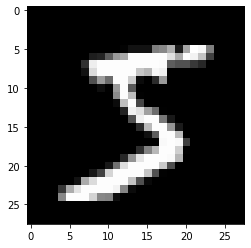

In [6]:
img, label = data[0]
plt.imshow(img, cmap='gray')
print('Label:', label)

We are going to change data to tensor variables.

In [7]:
import torchvision.transforms as transforms

In [8]:
# download data
data = MNIST(root = 'data/',
             train = True,
             transform = transforms.ToTensor())

In [9]:
# split to images and labels
img, label = data[0]
print(img.shape, label)

torch.Size([1, 28, 28]) 5


In [10]:
# select a region of image and get max and min
print(img[:, 10:15, 10:15])
print(torch.max(img), torch.min(img))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


Where 0 is black color and 1 is white color.

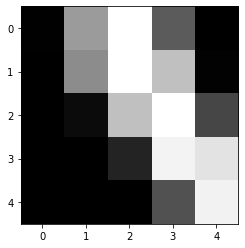

In [11]:
plt.imshow(img[0,10:15,10:15], 'gray')
plt.show()

## **Training and Validation**



1.   **Training set:** compute the loss and adjust the weights of the model using gradient descent.
2.   **Validation set:** adjust hyperparameters (for example: lr) and pick the best version of the model.
3. **Test set:** used to compare different models or types of modelling approaches and report the final accuracy of the model.



In [12]:
import numpy as np

def split_indices(n, val_pct):
  """
      args:
              n -  number of values       (int)
              val_pct - percent to take   (float)
      return: 
              training set      (array of indices) 
              validation  set   (array of indices)
  """
  # determine size of validation set
  n_val = int(val_pct * n)

  # create random permutation of 0 to n-1
  idxs = np.random.permutation(n)

  # pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val] 

In [13]:
train_i, val_i = split_indices(n = len(data),
                               val_pct = 0.2)

In [14]:
print(len(train_i), len(val_i))
print('Sample val indices:', val_i[:10])

48000 12000
Sample val indices: [26374 29850 26885 54963 54590 54033 38830 32670 51329 27776]


In [15]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [16]:
batch_size = 100

# training sampler and data loader
train_sampler = SubsetRandomSampler(train_i)
train_loader = DataLoader(data,
                          batch_size,
                          sampler=train_sampler)

# validation sampler and data loader
val_sampler = SubsetRandomSampler(val_i)
val_loader = DataLoader(data,
                          batch_size,
                          sampler=val_sampler)


## **Model**



*   **Logistic regression** is almost identical to linear regression model `( pred = x @ w.t() + b )`
*   We just use `nn.Linear` to create the model instead of defining and initializing the matrices manually.
*   The output is a vector of size 10, with every probability of particular target label (0-9). 


 

In [17]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0266,  0.0357, -0.0187,  ...,  0.0098, -0.0023, -0.0285],
        [-0.0294, -0.0267, -0.0005,  ...,  0.0055, -0.0125,  0.0173],
        [-0.0066, -0.0135,  0.0257,  ..., -0.0203, -0.0104,  0.0194],
        ...,
        [-0.0104,  0.0129, -0.0133,  ..., -0.0348,  0.0050,  0.0336],
        [-0.0020, -0.0343,  0.0211,  ..., -0.0301, -0.0267,  0.0071],
        [-0.0346, -0.0100,  0.0123,  ..., -0.0331, -0.0309,  0.0312]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0043,  0.0210,  0.0275,  0.0128, -0.0338, -0.0217, -0.0167,  0.0229,
        -0.0041, -0.0300], requires_grad=True)

In [20]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([4, 3, 5, 4, 2, 6, 4, 6, 4, 4, 1, 1, 7, 4, 8, 8, 4, 1, 1, 7, 0, 5, 8, 0,
        2, 8, 9, 6, 8, 2, 1, 8, 3, 0, 9, 9, 7, 7, 8, 6, 8, 4, 4, 4, 2, 3, 1, 7,
        4, 0, 0, 5, 7, 0, 5, 9, 6, 8, 1, 4, 1, 8, 1, 1, 3, 6, 3, 3, 0, 3, 2, 9,
        8, 1, 6, 1, 9, 8, 2, 5, 9, 0, 9, 1, 0, 7, 8, 5, 7, 0, 0, 2, 1, 9, 7, 2,
        1, 0, 9, 9])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

This error y because we have a shape 1x20x20 but we need a vector of size 784.

In [21]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel() 

In [22]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0234, -0.0247,  0.0326,  ..., -0.0244, -0.0129, -0.0250],
         [ 0.0116,  0.0061, -0.0244,  ...,  0.0343, -0.0223,  0.0113],
         [ 0.0219,  0.0228, -0.0098,  ...,  0.0214, -0.0108, -0.0199],
         ...,
         [ 0.0321, -0.0028, -0.0035,  ...,  0.0272,  0.0355, -0.0339],
         [ 0.0283,  0.0178, -0.0238,  ...,  0.0296, -0.0101, -0.0327],
         [-0.0046,  0.0253,  0.0066,  ..., -0.0287,  0.0030,  0.0343]],
        requires_grad=True), Parameter containing:
 tensor([-0.0302,  0.0182, -0.0166,  0.0289, -0.0098, -0.0320,  0.0327,  0.0246,
          0.0030, -0.0055], requires_grad=True)]

In [25]:
for images, labels in train_loader:
  outputs = model(images)
  break

print('Outputs shape:', outputs.shape)
print('Sample outputs:\n', outputs[:2].data)

Outputs shape: torch.Size([100, 10])
Sample outputs:
 tensor([[-0.0041,  0.4124, -0.1818,  0.1052, -0.3190,  0.0301, -0.0376, -0.5573,
          0.0746, -0.1030],
        [ 0.0277,  0.1581,  0.0197,  0.2479,  0.1811, -0.2653,  0.1012, -0.2026,
         -0.1969, -0.0812]])


In [26]:
import torch.nn.functional as F

In [29]:
# obtaining softmax of every row
probs = F.softmax(outputs, dim=1)

print('Sample Probabilities:\n', probs[:2].data)
print('Sum:', torch.sum(probs[1]).item())

Sample Probabilities:
 tensor([[0.1024, 0.1553, 0.0857, 0.1142, 0.0748, 0.1060, 0.0990, 0.0589, 0.1108,
         0.0928],
        [0.1015, 0.1156, 0.1007, 0.1265, 0.1183, 0.0757, 0.1092, 0.0806, 0.0811,
         0.0910]])
Sum: 1.0


In [30]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 3, 1, 1, 8, 9, 9, 1, 0, 1, 0, 9, 1, 4, 1, 1, 6, 1, 0, 1, 3, 1, 0, 1,
        2, 1, 1, 1, 9, 0, 4, 1, 1, 1, 1, 1, 4, 2, 4, 1, 0, 4, 1, 0, 1, 1, 2, 4,
        1, 1, 8, 0, 1, 1, 3, 1, 1, 8, 3, 0, 1, 1, 1, 1, 9, 6, 1, 3, 0, 3, 4, 1,
        1, 0, 3, 1, 6, 1, 1, 2, 9, 2, 0, 0, 1, 0, 1, 1, 1, 3, 1, 2, 1, 0, 4, 1,
        9, 0, 0, 5])
tensor([0.1553, 0.1265, 0.1404, 0.1517, 0.1367, 0.1321, 0.1468, 0.1594, 0.1333,
        0.1395, 0.1459, 0.1229, 0.1336, 0.1224, 0.1253, 0.1309, 0.1187, 0.1294,
        0.1465, 0.1584, 0.1149, 0.1315, 0.1307, 0.1455, 0.1186, 0.1474, 0.1279,
        0.1285, 0.1512, 0.1251, 0.1114, 0.1232, 0.1424, 0.1246, 0.1271, 0.1199,
        0.1329, 0.1125, 0.1229, 0.1371, 0.1212, 0.1207, 0.1354, 0.1184, 0.1264,
        0.1723, 0.1185, 0.1131, 0.1578, 0.1213, 0.1230, 0.1191, 0.1440, 0.1380,
        0.1250, 0.1473, 0.1344, 0.1348, 0.1221, 0.1580, 0.1339, 0.1423, 0.1341,
        0.1400, 0.1198, 0.1370, 0.1406, 0.1198, 0.1367, 0.1194, 0.1191, 0.1378,
        0.1356, 0.1

In [31]:
labels

tensor([5, 8, 4, 9, 1, 9, 4, 8, 8, 9, 8, 2, 4, 7, 2, 9, 2, 6, 6, 0, 2, 2, 1, 6,
        1, 6, 9, 3, 0, 1, 1, 5, 0, 6, 6, 3, 8, 6, 8, 9, 8, 9, 9, 6, 6, 2, 1, 7,
        0, 8, 1, 2, 5, 5, 7, 5, 0, 1, 7, 6, 5, 5, 4, 8, 3, 9, 6, 1, 2, 2, 2, 7,
        7, 4, 1, 8, 8, 9, 9, 6, 1, 3, 6, 6, 3, 2, 3, 7, 9, 1, 9, 1, 5, 1, 8, 9,
        2, 2, 2, 5])

# Evaluation Metric and Loss Function 

In [32]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item() / len(l1)

In [36]:
accuracy(preds, labels)

0.02

In [37]:
loss_fn = F.cross_entropy

In [38]:
# Loss fof current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3453, grad_fn=<NllLossBackward0>)


# Optimizer

Function to update the weights and biases during training. 

In [39]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training the Model

In [40]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)

    if opt:
      # compute gradients
      loss.backward()
      
      # update parameters
      opt.step()

      # reset gradients
      opt.zero_grad()
    
    metric_result = None
    if metric:
      # compute the metric
      metric_result = metric(preds, yb)

    return loss.item(), len(xb), metric_result 

In [54]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                    for xb, yb in valid_dl]
        # separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # total size of the dataset
        total = np.sum(nums)
        # average loss across batches
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None

        if metric:
          # average of metric across batches
          avg_metric = np.sum(np.multiply(metrics, nums)) / total

    return avg_loss, total, avg_metric

In [43]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [46]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 0.0316, Accuracy: 0.0316


In [51]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
      # training 
      for xb, yb in train_dl:
          loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

      # evaluation
      result = evaluate(model, loss_fn, valid_dl, metric)
      val_loss, total, val_metric = result

      # print progress
      if metric:
        print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
              .format(epoch+1, epochs, val_loss, metric.__name__, val_metric)) 
      else:
        print('Epoch [{}/{}], Loss: {:.4f}'
              .format(epoch+1, epochs, val_loss))
        

In [56]:
# Redefine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [57]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8764, accuracy: 0.6477
Epoch [2/5], Loss: 1.5810, accuracy: 0.7372
Epoch [3/5], Loss: 1.3722, accuracy: 0.7708
Epoch [4/5], Loss: 1.2216, accuracy: 0.7912
Epoch [5/5], Loss: 1.1097, accuracy: 0.8044


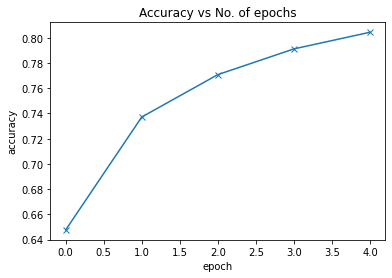

In [59]:
# plot accuracies

accuracies = [0.6477, 0.7372, 0.7708, 0.7912, 0.8044]

plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')
plt.show()

# Testing with Individual Images

In [61]:
# define test data

test_data = MNIST(root='data/',
                  train=False,
                  transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


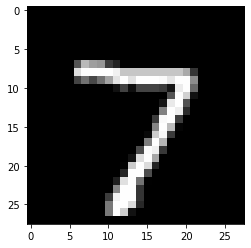

In [63]:
img, label = test_data[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [64]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [68]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 , Predicted: 7


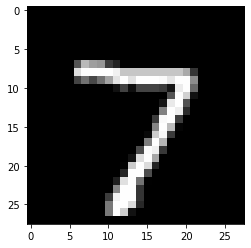

In [69]:
img, label = test_data[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))
plt.show()

Label: 0 , Predicted: 0


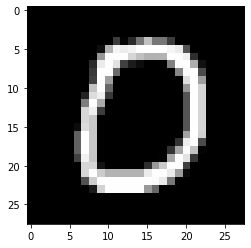

In [70]:
img, label = test_data[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))
plt.show()